In [1]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
%matplotlib inline 

# cross validation using grid search
from sklearn.model_selection import GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html




#from tqdm import tqdm # for progressive bar

from sklearn.externals import joblib # to save model


from P300.data import load_data


## For training use `train_kNN_cv.py`

```
python train_kNN_cv A
python train_kNN_cv B
python train_kNN_cv AandB
```


## Analyze training results

In [2]:
def plot_results_kNN(results):
    k = np.array(results['param_n_neighbors'].data, dtype=int)
    mean_test_score = results['mean_test_score']
    std_test_score = results['std_test_score']

    print(mean_test_score)
    print(std_test_score)

    #plt.plot(k, mean_test_score)
    plt.errorbar(k, mean_test_score, std_test_score)

    plt.xlabel('k')
    plt.ylabel('mean_test_score')

# plotting code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html




[0.77457516 0.80529412 0.8179085  0.82535948 0.82882353 0.83098039
 0.83143791 0.83222222 0.8324183  0.8327451  0.8330719  0.83333333
 0.83333333 0.83339869 0.83339869]
[0.00752174 0.00337346 0.0015659  0.00121576 0.00063368 0.00052288
 0.00066654 0.00044329 0.00052288 0.00052288 0.00032019 0.00035799
 0.00020668 0.00013072 0.00013072]


Text(0.5, 1.0, 'Subject A')

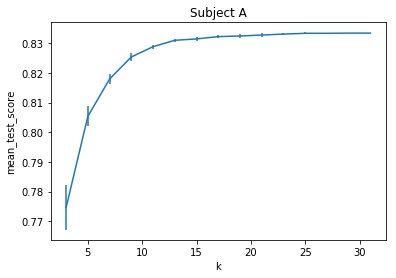

In [3]:
subject_train = 'A'
num_ch = 64
cv = joblib.load("model/{}_kNN_cv_ch{}.model".format(subject_train,num_ch))

results = cv.cv_results_
#print(results)
plot_results_kNN(results)

plt.title('Subject {}'.format(subject_train))

[0.79326797 0.81470588 0.82326797 0.82771242 0.83019608 0.83137255
 0.8320915  0.83267974 0.83267974 0.83281046 0.83313725 0.83313725
 0.83313725 0.83313725 0.83333333]
[0.00452163 0.00311402 0.00165864 0.00056224 0.00064039 0.00120517
 0.00024455 0.00020668 0.00041337 0.00026144 0.0001601  0.0001601
 0.0001601  0.0001601  0.        ]


Text(0.5, 1.0, 'Subject B')

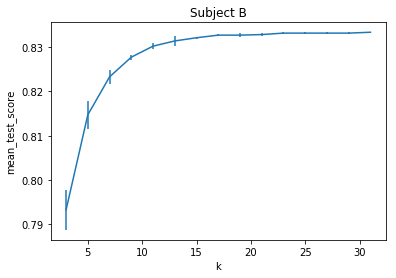

In [4]:
subject_train = 'B'
num_ch = 64
cv = joblib.load("model/{}_kNN_cv_ch{}.model".format(subject_train,num_ch))

results = cv.cv_results_
#print(results)
plot_results_kNN(results)

plt.title('Subject {}'.format(subject_train))

[0.79062092 0.8124183  0.82379085 0.82859477 0.83035948 0.83153595
 0.83245098]
[0.00182715 0.00129899 0.0015522  0.00124441 0.00040554 0.00048472
 0.00059005]


Text(0.5, 1.0, 'Subject AandB')

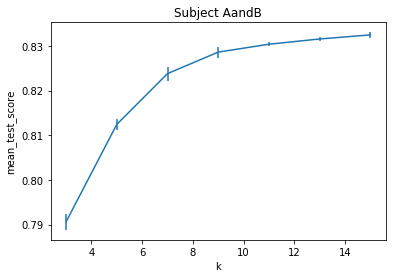

In [5]:
subject_train = 'AandB'
num_ch = 64
cv = joblib.load("model/{}_kNN_cv_ch{}.model".format(subject_train,num_ch))

results = cv.cv_results_
#print(results)
plot_results_kNN(results)

plt.title('Subject {}'.format(subject_train))

## k-nearest neighbor classifier